In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from skimpy import skim
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import lightgbm as lgb
import xgboost as xgb
import pickle
import warnings
warnings.filterwarnings('ignore')

# Cargar el DataSet

In [2]:
df = pd.read_csv('../data/processed/coches_baratos_procc.csv')
df

,Brand_c,Price,Kilometers,Seats,Doors,Brand_Model_code,Car_Age,Country_c,Gearbox_c,Fuel_c,Seller_c,Type_c,Drivetrain_c,Upholstery_c,Color_c,Body_Type_c
0,0,5100.0,225282.0,7.0,5.0,0.205,12,1,0,1,0,0,1,1,0,5
1,0,1995.0,162076.0,4.0,5.0,0.181,15,2,1,0,0,0,0,0,1,2
2,0,2995.0,53914.0,4.0,5.0,0.181,19,2,1,0,0,0,0,0,0,2
3,0,1450.0,238642.0,5.0,5.0,0.030,19,2,1,0,0,0,0,0,0,2
4,0,8900.0,199000.0,5.0,5.0,0.354,8,1,1,4,0,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11403,30,54980.0,29652.0,2.0,2.0,30.425,9,0,1,0,0,0,1,1,0,4
11404,30,33600.0,91785.0,2.0,2.0,30.095,45,0,0,0,1,0,2,1,0,4
11405,30,15000.0,81000.0,2.0,2.0,30.095,54,1,1,0,1,0,1,1,13,4
11406,30,21800.0,85000.0,2.0,2.0,30.095,54,4,1,0,1,0,2,3,10,6


Hago uso de una función del paquete skimr para ver un resumen estadístico completo de mi DataFrame. Es como df.describe() de pandas pero mucho más detallado y visual.

In [3]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 11408  │ │ int64       │ 11    │                                                          │
│ │ Number of columns │ 16     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column             ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0     ┃ p25   ┃ p50   ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Brand_c            │   0 │     0 │    14.27 │   8.745 │      0 │     7 │    14 │     21 │      36 │ ████▆▁ │  │
│ │ Price              │   0 │     0 │    20030 │   11630 │    300 │ 11500 │ 18350 │  26800 │   60000 │ ▅█▆▂▁  │  │
│ │ Kilometers         │   0 │     0 │    86350 │   74000 │      0 │ 30640 │ 72280 │ 125000 │ 2014000 │   █    │  │
│ │ Seats              │   0 │     0 │    4.967 │  0.6676 │      1 │     5 │     5 │      5 │       9 │    ▁█  │  │
│ │ Doors              │   0 │     0 │      4.6 │  0.7568 │      2 │     4 │     5 │      5 │       7 │    ▂█  │  │
│ │ Brand_Model_code   │   0 │     0 │    14.58 │   8.698 │  0.001 │ 7.268 │ 14.56 │     22 │      36 │ ████▆▁ │  │
│ │ Car_Age            │   0 │     0 │    7.641 │   7.215 │      0 │     3 │     6 │     10 │      79 │   █▁   │  │
│ │ Country_c          │   0 │     0 │    1.134 │   1.358 │      0 │     0 │     1 │      2 │       7 │  █▂▁   │  │
│ │ Gearbox_c          │   0 │     0 │   0.4464 │  0.5163 │      0 │     0 │     0 │      1 │       2 │  █  ▆  │  │
│ │ Fuel_c             │   0 │     0 │    0.882 │   1.146 │      0 │     0 │     1 │      1 │       9 │  █▁▁   │  │
│ │ Seller_c           │   0 │     0 │  0.01911 │  0.1369 │      0 │     0 │     0 │      0 │       1 │   █    │  │
│ │ Type_c             │   0 │     0 │    0.216 │  0.7703 │      0 │     0 │     0 │      0 │       5 │   █    │  │
│ │ Drivetrain_c       │   0 │     0 │   0.3963 │  0.6103 │      0 │     0 │     0 │      1 │       2 │ █  ▃ ▁ │  │
│ │ Upholstery_c       │   0 │     0 │   0.7991 │   1.097 │      0 │     0 │     0 │      1 │       5 │  █▄▂▁  │  │
│ │ Color_c            │   0 │     0 │    1.868 │   2.096 │      0 │     0 │     1 │      3 │      13 │  █▂▁   │  │
│ │ Body_Type_c        │   0 │     0 │     1.32 │   1.675 │      0 │     0 │     1 │      2 │       8 │  █▁▁▁  │  │
│ └────────────────────┴─────┴───────┴──────────┴─────────┴────────┴───────┴───────┴────────┴─────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11408 entries, 0 to 11407
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand_c           11408 non-null  int64  
 1   Price             11408 non-null  float64
 2   Kilometers        11408 non-null  float64
 3   Seats             11408 non-null  float64
 4   Doors             11408 non-null  float64
 5   Brand_Model_code  11408 non-null  float64
 6   Car_Age           11408 non-null  int64  
 7   Country_c         11408 non-null  int64  
 8   Gearbox_c         11408 non-null  int64  
 9   Fuel_c            11408 non-null  int64  
 10  Seller_c          11408 non-null  int64  
 11  Type_c            11408 non-null  int64  
 12  Drivetrain_c      11408 non-null  int64  
 13  Upholstery_c      11408 non-null  int64  
 14  Color_c           11408 non-null  int64  
 15  Body_Type_c       11408 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 1

## Preparar el X e y, dividir en train y test

In [5]:
X = df.drop(columns = ['Price'])
y = df['Price']

In [6]:
X

,Brand_c,Kilometers,Seats,Doors,Brand_Model_code,Car_Age,Country_c,Gearbox_c,Fuel_c,Seller_c,Type_c,Drivetrain_c,Upholstery_c,Color_c,Body_Type_c
0,0,225282.0,7.0,5.0,0.205,12,1,0,1,0,0,1,1,0,5
1,0,162076.0,4.0,5.0,0.181,15,2,1,0,0,0,0,0,1,2
2,0,53914.0,4.0,5.0,0.181,19,2,1,0,0,0,0,0,0,2
3,0,238642.0,5.0,5.0,0.030,19,2,1,0,0,0,0,0,0,2
4,0,199000.0,5.0,5.0,0.354,8,1,1,4,0,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11403,30,29652.0,2.0,2.0,30.425,9,0,1,0,0,0,1,1,0,4
11404,30,91785.0,2.0,2.0,30.095,45,0,0,0,1,0,2,1,0,4
11405,30,81000.0,2.0,2.0,30.095,54,1,1,0,1,0,1,1,13,4
11406,30,85000.0,2.0,2.0,30.095,54,4,1,0,1,0,2,3,10,6


Dividir los datos en test y train usando 70% de los registros para aprender y dejando 20% para testear.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [8]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (11408, 15)
Train features shape: (9126, 15)
Train target shape: (9126,)
Test features shape: (2282, 15)
Test target shape: (2282,)


# Linear Regression
Probar con el modelo más simple

In [9]:
lm = LinearRegression()
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Veamos los coeficientes del modelo Linear Regression

In [10]:
coeff_df = pd.DataFrame(lm.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
Brand_c,-10939.643266
Kilometers,-0.056963
Seats,296.174164
Doors,-1333.082721
Brand_Model_code,11499.587310
Car_Age,-408.734147
Country_c,405.538776
Gearbox_c,-3588.708446
Fuel_c,204.096679
Seller_c,-651.569106


### Conclusiones del análisis de coeficientes del modelo Linear Regression
+ Brand_Model_code:
    El código específico del modelo tiene un efecto enorme en el precio. Esto sugiere que modelos premium o específicos mantienen mucho valor.
+ Drivetrain_c:
    netarias por cierta categoría, probablemente 4x4 vs tracción delantera).

 Variables con impacto negativo fuerte:
+ Kilometers :
Por cada kilómetro adicional, el precio baja ~0.057 unidades. Aunque el coeficiente es pequeño, en escala (ej. 100000 km) implica –5700 unidades de precio.
+ Car_Age :
Por cada año de antigüedad, el precio baja ~408 unidades.
+ Gearbox_c :
El tipo de caja (manual vs automática) tiene un efecto importante. Los manuales valen menos.
+ Doors :
Curiosamente, más puertas se asocia con menor precio. Podría deberse a que modelos más grandes/familiares (5 puertas) son menos premium que cupés (3 puertas).

In [11]:
predictions = lm.predict(X_test)
predictions

array([ 5677.30513629, 21115.28075664, 18909.32326985, ...,
       25678.23530016, 19179.32653019, 17913.98262137])

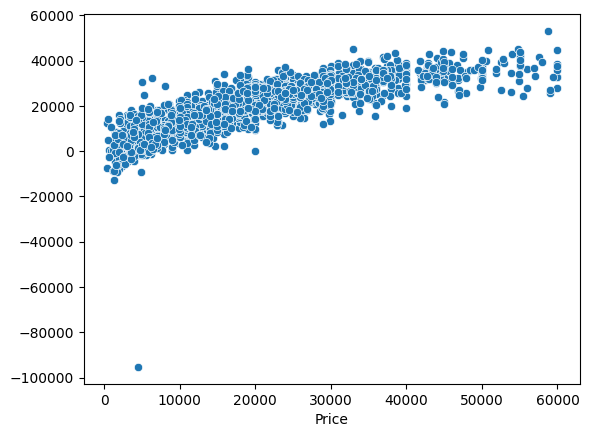

In [12]:
sns.scatterplot(x = y_test, y = predictions);

In [13]:
print('EVALUACIÓN DE LAS METRICAS DE LINEAR REGRESSION')
print('=' *47)
print(f'MAE: € {metrics.mean_absolute_error(y_test, predictions):,.2f}')
print(f'RMSE: € {metrics.root_mean_squared_error(y_test, predictions):,.2f}')
print(f'R2:  {metrics.r2_score(y_test, predictions):,.2f}')

EVALUACIÓN DE LAS METRICAS DE LINEAR REGRESSION
MAE: € 4,645.98
RMSE: € 6,597.81
R2:  0.67


Analisar los outliers:

In [14]:
residuals = y_test - predictions

# Identificar outliers
std_residuals = np.std(residuals)
outlier_threshold = 3 * std_residuals
outlier_indices = np.where(np.abs(residuals) > outlier_threshold)[0]

print("ANÁLISIS DE OUTLIERS")
print(f"Desviación estándar de residuos: {std_residuals:.4f}")
print(f"Umbral de outlier: ±{outlier_threshold:.4f}")
print(f"Número de outliers identificados: {len(outlier_indices)}")

ANÁLISIS DE OUTLIERS
Desviación estándar de residuos: 6597.7942
Umbral de outlier: ±19793.3825
Número de outliers identificados: 33


Intentando borrar los outliers encontrados y reentrenar el modelo.

In [15]:
X_train_clean = X_train.copy()
y_train_clean = y_train.copy()

# Identificar outliers en entrenamiento también
train_pred = lm.predict(X_train)
train_residuals = y_train - train_pred
train_outliers = np.where(np.abs(train_residuals) > outlier_threshold)[0]

if len(train_outliers) > 0:
    print(f"Eliminando {len(train_outliers)} outliers del entrenamiento")
    X_train_clean = np.delete(X_train, train_outliers, axis=0)
    y_train_clean = np.delete(y_train, train_outliers, axis=0)
    
    # Reentrenar modelo
    model_clean = LinearRegression()
    model_clean.fit(X_train_clean, y_train_clean)
    
    # Nueva evaluación
    y_pred_clean = model_clean.predict(X_test)
    rmse_clean = np.sqrt(metrics.mean_squared_error(y_test, y_pred_clean))
    mae_clean = metrics.mean_absolute_error(y_test, y_pred_clean)
    print('Nuevas metricas de Linear Regression:')
    print('=' *40)
    print(f"MAE: € {mae_clean:,.2f}")
    print(f"RMSE: € {rmse_clean:,.2f}")
    print(f'R2:  {metrics.r2_score(y_test, y_pred_clean):,.2f}')

Eliminando 132 outliers del entrenamiento
Nuevas metricas de Linear Regression:
MAE: € 4,559.08
RMSE: € 6,566.24
R2:  0.67


El modelo ha mejorado de un MAE: 4645.97 a 4559.08, pero sigue siendo muy alto.

Guardar el modelo en un fichero pkl.

In [16]:
pickle.dump(lm, open("../models/coches_baratos/Linear_Regression_model.pkl", "wb"))

# Ridge, Lasso, Elastic Net

In [17]:
# Escalar features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression (L2)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Lasso Regression (L1)
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

#. ElasticNet (combinación L1 + L2)
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)
elastic.fit(X_train_scaled, y_train)
y_pred_elastic = elastic.predict(X_test_scaled)

print("COMPARACIÓN CON REGULARIZACIÓN:")
for name, pred in [('Ridge', y_pred_ridge), 
                   ('Lasso', y_pred_lasso), 
                   ('ElasticNet', y_pred_elastic)]:
    mae = metrics.mean_absolute_error(y_test, pred)
    mse = metrics.mean_squared_error(y_test, pred)
    r2 = metrics.r2_score(y_test, pred)
    print(f"{name:12} - MSE: {mse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")

ridge_mae = metrics.mean_absolute_error(y_test, y_pred_ridge)
lasso_mae = metrics.mean_absolute_error(y_test, y_pred_lasso)
elastic_mae = metrics.mean_absolute_error(y_test, y_pred_elastic)

COMPARACIÓN CON REGULARIZACIÓN:
Ridge        - MSE: 43857417.8292, R²: 0.6663, MAE: 4641.3699
Lasso        - MSE: 43530283.1346, R²: 0.6688, MAE: 4645.5923
ElasticNet   - MSE: 48065727.9195, R²: 0.6343, MAE: 4861.0036


In [18]:
pickle.dump(ridge, open("../models/coches_baratos/Ridge_model.pkl", "wb"))
pickle.dump(lasso, open("../models/coches_baratos/Lasso_model.pkl", "wb"))
pickle.dump(elastic, open("../models/coches_baratos/Elastic_Net_model.pkl", "wb"))

# Random Forest, Gradient Boosting, Decision Tree

In [19]:
# 1. Random Forest
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 2. Gradient Boosting
gb = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# 3. Decision Tree
tree = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=10,
    random_state=42
)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("COMPARACIÓN CON MODELOS DE ENSEMBLE:")
ensemble_results = {
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
    'Decision Tree': y_pred_tree
}

for name, pred in ensemble_results.items():
    mse = metrics.mean_squared_error(y_test, pred)
    r2 = metrics.r2_score(y_test, pred)
    mae = metrics.mean_absolute_error(y_test, pred)
    
    print(f"{name:20} - MSE: {mse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")

rf_mae = metrics.mean_absolute_error(y_test, y_pred_rf)
tree_mae = metrics.mean_absolute_error(y_test, y_pred_tree)

COMPARACIÓN CON MODELOS DE ENSEMBLE:
Random Forest        - MSE: 20727038.1326, R²: 0.8423, MAE: 3135.4142
Gradient Boosting    - MSE: 16910147.4199, R²: 0.8713, MAE: 2799.5767
Decision Tree        - MSE: 29078582.1786, R²: 0.7788, MAE: 3628.0123


De momento guardamos solo los modelos Random Forest y Decision Tree. El modelo Gradient Boosting lo vamos a mejorar.

In [20]:
pickle.dump(rf, open("../models/coches_baratos/Random_Forest_model.pkl", "wb"))
pickle.dump(tree, open("../models/coches_baratos/Decision_Tree_model.pkl", "wb"))

# Gradient Boosting mejorado

In [21]:
# Configuración mejorada
gb_better = GradientBoostingRegressor(
    n_estimators=300,           # ↑ Más árboles
    learning_rate=0.08,         # ↓ Tasa de aprendizaje más baja
    max_depth=6,                # ↑ Profundidad moderada
    min_samples_split=10,       # Evitar sobreajuste
    min_samples_leaf=5,         # Regularización
    subsample=0.8,
    max_features='sqrt',
    random_state=42,
    n_iter_no_change=10,
    validation_fraction=0.1
)
gb_better.fit(X_train, y_train)
y_pred_gb = gb_better.predict(X_test)

In [22]:
print('Metricas de Gradient Boosting:')
print('=' *40)
print(f'MAE: € {metrics.mean_absolute_error(y_test, y_pred_gb):,.2f}')
print(f'RMSE: € {metrics.root_mean_squared_error(y_test, y_pred_gb):,.2f}')
print(f'R2:  {metrics.r2_score(y_test, y_pred_gb):,.2f}')

Metricas de Gradient Boosting:
MAE: € 2,601.63
RMSE: € 3,908.58
R2:  0.88


# Gradient Boosting con GridSearch

In [23]:
param_dist = {
    'n_estimators': randint(100, 400),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 8),
    'min_samples_split': randint(10, 30),
    'min_samples_leaf': randint(4, 20),
    'subsample': uniform(0.7, 0.3),
    'max_features': ['sqrt', 'log2', 0.5, 0.7]
}

gb = GradientBoostingRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
random_search.fit(X_train, y_train)

print(f"\n🏆 MEJORES PARÁMETROS:")
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")

    
best_model = random_search.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits

🏆 MEJORES PARÁMETROS:
  learning_rate: 0.06888977841391714
  max_depth: 7
  max_features: 0.7
  min_samples_leaf: 10
  min_samples_split: 10
  n_estimators: 355
  subsample: 0.8455839622828947


In [25]:
bgrs_pred = best_model.predict(X_test)
gb_mae = metrics.mean_absolute_error(y_test, bgrs_pred)

print('Metricas de Linear Regression mejorado:')
print('=' *40)
print(f'MAE: € {gb_mae:,.2f}')
print(f'RMSE: € {metrics.root_mean_squared_error(y_test, bgrs_pred):,.2f}')
print(f'R2:  {metrics.r2_score(y_test, bgrs_pred):,.2f}')

Metricas de Linear Regression mejorado:
MAE: € 2,375.70
RMSE: € 3,712.55
R2:  0.90


In [26]:
pickle.dump(best_model, open("../models/coches_baratos/Gradient_Boosting_model.pkl", "wb"))

# Light Gradient Boosting

In [27]:
# Dataset de LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Parámetros
params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'verbose': -1,
    'random_state': 42
}

# Entrenar
print("\n🚀 Probando LightGBM...")
model_lgb = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    num_boost_round=3000,
    callbacks=[lgb.early_stopping(200), lgb.log_evaluation(100)]
)


🚀 Probando LightGBM...
Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 2910.48
[200]	valid_0's l1: 2644.65
[300]	valid_0's l1: 2540.88
[400]	valid_0's l1: 2472.5
[500]	valid_0's l1: 2425.7
[600]	valid_0's l1: 2403.57
[700]	valid_0's l1: 2383.08
[800]	valid_0's l1: 2363.41
[900]	valid_0's l1: 2341.67
[1000]	valid_0's l1: 2326.3
[1100]	valid_0's l1: 2317.35
[1200]	valid_0's l1: 2302.23
[1300]	valid_0's l1: 2298.33
[1400]	valid_0's l1: 2297.76
[1500]	valid_0's l1: 2295.65
[1600]	valid_0's l1: 2287.45
[1700]	valid_0's l1: 2285.64
[1800]	valid_0's l1: 2284.97
[1900]	valid_0's l1: 2285.95
Early stopping, best iteration is:
[1772]	valid_0's l1: 2283.15


In [31]:
y_pred_lgb = model_lgb.predict(X_test)
lgb_mae = metrics.mean_absolute_error(y_test, y_pred_lgb)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgb))
r2 = metrics.r2_score(y_test, y_pred_lgb)

print(f" RESULTADOS LightGBM:")
print(f"  MAE: €{lgb_mae:,.0f}")
print(f"  RMSE: €{rmse:,.0f}")
print(f"  R²: {r2:.4f}")

 RESULTADOS LightGBM:
  MAE: €2,283
  RMSE: €3,581
  R²: 0.9025


In [32]:
pickle.dump(model_lgb, open("../models/coches_baratos/LightGB_model.pkl", "wb"))

# XGBoost

In [33]:
# Convertir a formato DMatrix (óptimo para XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parámetros optimizados
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'learning_rate': 0.05,
    'max_depth': 6,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'random_state': 42,
    'n_jobs': -1
}

# Entrenar con early stopping
print("🚀 Probando XGBoost...")
model_xgb = xgb.train(
    params,
    dtrain,
    num_boost_round=3000,
    evals=[(dtest, 'test')],
    early_stopping_rounds=200,
    verbose_eval=100
)

🚀 Probando XGBoost...
[0]	test-mae:8707.44334
[100]	test-mae:2904.47607
[200]	test-mae:2639.28986
[300]	test-mae:2538.72281
[400]	test-mae:2455.64605
[500]	test-mae:2398.03574
[600]	test-mae:2361.88381
[700]	test-mae:2328.78399
[800]	test-mae:2304.14733
[900]	test-mae:2288.62191
[1000]	test-mae:2278.81982
[1100]	test-mae:2268.88258
[1200]	test-mae:2263.24477
[1300]	test-mae:2258.69898
[1400]	test-mae:2250.55070
[1500]	test-mae:2248.97201
[1600]	test-mae:2245.63127
[1700]	test-mae:2246.78510
[1800]	test-mae:2245.18463
[1900]	test-mae:2245.47223
[2000]	test-mae:2248.19413
[2047]	test-mae:2247.51884


In [34]:
# Convertir a formato DMatrix el X_test tambien
dtest = xgb.DMatrix(X_test)
y_pred_xgb = model_xgb.predict(dtest)

In [35]:
xgb_mae = metrics.mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2 = metrics.r2_score(y_test, y_pred_xgb)

print(f"📊 RESULTADOS XGBoost:")
print(f"  MAE: €{xgb_mae:,.2f}")
print(f"  RMSE: €{rmse:,.2f}")
print(f"  R²: {r2:.4f}")

📊 RESULTADOS XGBoost:
  MAE: €2,247.52
  RMSE: €3,600.32
  R²: 0.9014


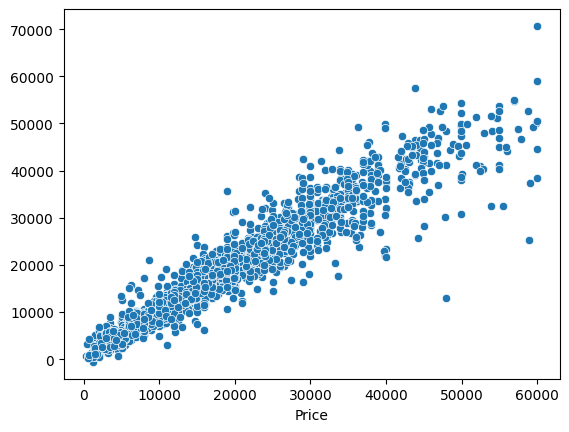

In [36]:
sns.scatterplot(x = y_test, y = y_pred_xgb);

In [37]:
pickle.dump(model_xgb, open("../models/coches_baratos/XGBoost_model.pkl", "wb"))
pickle.dump(model_xgb, open("../models/coches_baratos/Best_Model.pkl", "wb"))

In [38]:
# Probar con un coche en concreto
feature_names = [
    'Brand_c', 'Kilometers',  'Seats', 'Doors', 
    'Brand_Model_code', 'Car_Age','Country_c', 'Gearbox_c', 'Fuel_c', 
    'Seller_c', 'Type_c', 'Drivetrain_c', 'Upholstery_c', 
    'Color_c', 'Body_Type_c'
]
mi_coche = [10, 234000.0, 12, 5, 5, 10.122, 5, 1, 1, 1, 0, 0, 0, 12, 3]
mi_coche_array = np.array(mi_coche).reshape(1, -1)
mi_coche_dmatrix = xgb.DMatrix(mi_coche_array, feature_names=feature_names)
precio = model_xgb.predict(mi_coche_dmatrix)
precio

array([10957.725], dtype=float32)

In [39]:
results = pd.DataFrame({'y_test': y_test, 'pred_LGBM': y_pred_lgb, 'pred_xgb': y_pred_xgb})
results.head(10)

,y_test,pred_LGBM,pred_xgb
6615,5750.0,7682.646060,7437.177246
2471,22838.0,22790.539443,22929.121094
4387,16900.0,16967.730575,18400.962891
5066,19890.0,16121.623508,16430.976562
1713,13500.0,13122.115497,12428.732422
1139,21300.0,18938.581687,19809.818359
5452,19490.0,19315.673209,18909.261719
5151,21480.0,24482.878011,24285.333984
4353,4995.0,4138.880805,5048.134766
5459,19689.0,17856.203663,16662.949219


In [41]:
precio_min = df['Price'].min()
precio_max = df['Price'].max()
precio_promedio_estimado = np.mean([precio_min, precio_max])

# Calcular error relativo
error_relativo_porcentaje = (xgb_mae / precio_promedio_estimado) * 100

print("ANÁLISIS CON RANGO €300-€60,000")
print("="*60)
print(f"• Rango de precios: €{precio_min:,} - €{precio_max:,}")
print(f"• Precio promedio estimado: €{precio_promedio_estimado:,.0f}")
print(f"• Error absoluto (MAE): €{xgb_mae:.2f}")
print(f"• Error relativo: {error_relativo_porcentaje:.1f}% del precio promedio")

ANÁLISIS CON RANGO €300-€60,000
• Rango de precios: €300.0 - €60,000.0
• Precio promedio estimado: €30,150
• Error absoluto (MAE): €2247.52
• Error relativo: 7.5% del precio promedio


## Modelo NO Supervisado

In [42]:
# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering para crear segmentos
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df['segmento_mercado'] = kmeans.fit_predict(X_scaled)

# PCA para reducir ruido
pca = PCA(n_components=0.9)
pca_features = pca.fit_transform(X_scaled)

# Crear nuevo DataFrame con todo
X_enhanced = pd.DataFrame(X_scaled, columns=X.columns)
for i in range(pca.n_components_):
    X_enhanced[f'pca_{i}'] = pca_features[:, i]

X_enhanced['segmento'] = df['segmento_mercado']
X_enhanced['dist_centroide'] = kmeans.transform(X_scaled).min(axis=1)

# Calcular distancia a cada centroide
distances = kmeans.transform(X_scaled)
for i in range(kmeans.n_clusters):
    X_enhanced[f'dist_centroide_{i}'] = distances[:, i]

# Modelo supervisado final
X_train, X_test, y_train, y_test = train_test_split(
    X_enhanced, y, test_size=0.2, random_state=42
)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parámetros de XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'learning_rate': 0.05,
    'max_depth': 6,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'random_state': 42,
    'n_jobs': -1
}

model_xgb = xgb.train(
    params,
    dtrain,
    num_boost_round=3000,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=200,
    verbose_eval=100
)


[0]	train-mae:8894.19694	test-mae:8700.78477
[100]	train-mae:2510.31266	test-mae:2937.09577
[200]	train-mae:2059.70890	test-mae:2724.79895
[300]	train-mae:1772.91830	test-mae:2622.08547
[400]	train-mae:1552.62675	test-mae:2557.59223
[500]	train-mae:1380.44683	test-mae:2523.56129
[600]	train-mae:1233.01598	test-mae:2490.89464
[700]	train-mae:1113.76392	test-mae:2475.72011
[800]	train-mae:1008.35697	test-mae:2464.64397
[900]	train-mae:912.26122	test-mae:2446.65367
[1000]	train-mae:831.16757	test-mae:2436.71343
[1100]	train-mae:759.00442	test-mae:2428.58562
[1200]	train-mae:694.51495	test-mae:2424.30150
[1300]	train-mae:635.26977	test-mae:2419.13019
[1400]	train-mae:582.34997	test-mae:2415.10314
[1500]	train-mae:534.54676	test-mae:2410.88366
[1600]	train-mae:491.36222	test-mae:2407.77543
[1700]	train-mae:452.57278	test-mae:2406.02457
[1800]	train-mae:416.22379	test-mae:2403.14283
[1900]	train-mae:384.07163	test-mae:2401.97810
[2000]	train-mae:354.97057	test-mae:2399.07754
[2100]	train-mae

In [43]:
# Evaluación
y_pred = model_xgb.predict(dtest)
no_superv_mae = metrics.mean_absolute_error(y_test, y_pred)
print("Resultados del modelo híbrido:")
print(f"R²: {metrics.r2_score(y_test, y_pred):.4f}")
print(f"Error medio absoluto: ${no_superv_mae:,.2f}")

Resultados del modelo híbrido:
R²: 0.8961
Error medio absoluto: $2,386.99


In [44]:
pickle.dump(model_xgb, open("../models/coches_baratos/NoSuperv_model.pkl", "wb"))

#### Mostrar los MAE de todos los modelos en un grafico de baras.

In [45]:
dict_maes = {
    'Linear Regression': mae_clean,
    'Ridge': ridge_mae,
    'Lasso': lasso_mae,
    'Elastic Net': elastic_mae,
    'Random Forest': rf_mae,
    'Decision Tree': tree_mae,
    'Gradient Boosting': gb_mae,
    'LightGBM': lgb_mae,
    'XGBoost': xgb_mae,
    'No Supervisado': no_superv_mae
}

modelos = list(dict_maes.keys())
mae_valores = list(dict_maes.values())

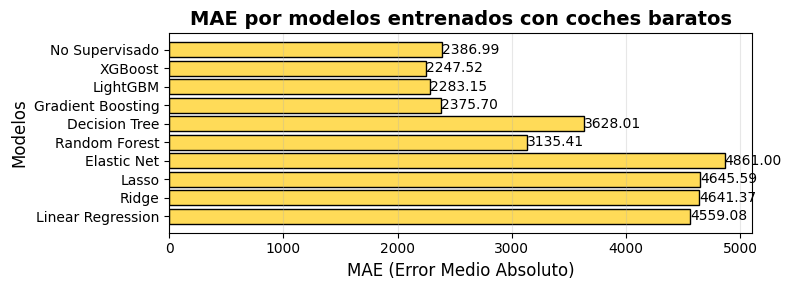

In [46]:
plt.figure(figsize=(8, 3))
bars = plt.barh(modelos, mae_valores, color='#FFDB58', edgecolor='black')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2.,
             f'{width:.2f}', ha='left', va='center', fontsize=10)

plt.title('MAE por modelos entrenados con coches baratos', fontsize=14, fontweight='bold')
plt.xlabel('MAE (Error Medio Absoluto)', fontsize=12)
plt.ylabel('Modelos', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()